In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk import PorterStemmer
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import warnings
warnings.filterwarnings("ignore")

In [88]:
train = pd.read_csv("C:\\Users\\RASIKA KAMBLI\\Downloads\\archive (18)\\train.csv")
test = pd.read_csv("C:\\Users\\RASIKA KAMBLI\\Downloads\\archive (18)\\test.csv")

In [89]:
merge = pd.concat([train,test])

In [90]:
merge

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
...,...,...,...
17192,49155,NaN,thought factory: left-right polarisation! #tru...
17193,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
17194,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,NaN,"happy, at work conference: right mindset leads..."


In [91]:
def del_sym(msg,sym):
    r = re.findall(sym,msg)
    for i in r:
        msg = re.sub(i,"",msg)
    return msg

In [92]:
merge['Clear Tweets']=np.vectorize(del_sym)(merge['tweet'], "@[\w]*")

In [93]:
merge

,id,label,tweet,Clear Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
17192,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
17193,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
17194,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."


In [94]:
merge['Clear Tweets']=merge['Clear Tweets'].str.replace("[^a-zA-Z#]", " ")

In [95]:
merge['Clear Tweets']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can t use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide  society now    #motivation
                               ...                        
17192    thought factory  left right polarisation  #tru...
17193    feeling like a mermaid      #hairflip #neverre...
17194    #hillary #campaigned today in #ohio  omg    am...
17195    happy  at work conference  right mindset leads...
17196    my   song  so glad  free download   #shoegaze ...
Name: Clear Tweets, Length: 49159, dtype: object

In [96]:
merge['Clear Tweets']=merge['Clear Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

merge

,id,label,tweet,Clear Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
17192,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
17193,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
17194,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio used words li...
17195,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset leads cult...


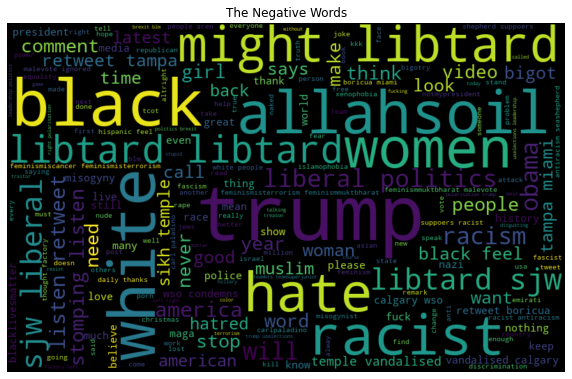

In [100]:
all_words_negative = ' '.join(text for text in merge['Clear Tweets'][merge['label']==1])
wordcloud = WordCloud(background_color = 'black', width=800, height=500, random_state = 0, max_font_size = 110).generate(all_words_negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

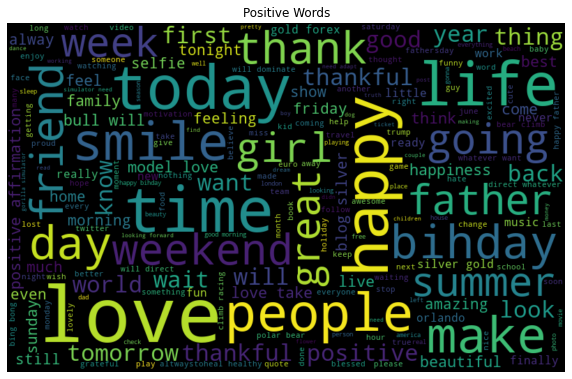

In [101]:
all_words_positive = ' '.join(text for text in merge['Clear Tweets'][merge['label']==0])
wordcloud = WordCloud(background_color = 'black', width=800, height=500, random_state = 0, max_font_size = 110).generate(all_words_positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive Words')
plt.show()